<a href="https://colab.research.google.com/github/zakariarafi/Data_Science_Practice/blob/Main/Zakaria_Rafi_ProyekDSHousing_BCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek BCC Data Science: Housing Analytics
- Nama: Zakaria Rafi
- Email: zakariarafifahmi@gmail.com

## Domain Proyek

📢 PENUGASAN 📢
Data Science Mini Bootcamp BCC 2023

⚠️ Petunjuk Pengerjaan ⚠️
1⃣ Peserta dapat menggunakan berbagai teknik, baik yang telah diajarkan maupun yang belum diajarkan untuk melakukan analisa pada dataset yang disediakan
2⃣ Kolom yang harus diprediksi adalah medianHouseValue
3⃣ Dataset: https://raw.githubusercontent.com/SulthanAbiyyu/mini-bootcamp-bcc-2023/master/housing.csv

‼️ Deadline ‼️
📆 Senin, 6 November 2023
🕐 Pukul 23.59 WIB

## Import Libraries

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

Di bagian ini, kita mengimpor library yang diperlukan untuk analisis data, visualisasi, pemodelan, dan evaluasi model.

## Load Dataset

In [16]:
#Download
!wget --no-check-certificate \
  https://raw.githubusercontent.com/SulthanAbiyyu/mini-bootcamp-bcc-2023/master/housing.csv

--2023-11-06 13:59:38--  https://raw.githubusercontent.com/SulthanAbiyyu/mini-bootcamp-bcc-2023/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv.1’

housing.csv.1       100%[===================>]   1.36M  --.-KB/s    in 0.02s   

2023-11-06 13:59:38 (72.2 MB/s) - ‘housing.csv.1’ saved [1423529/1423529]



In [17]:
file_path = 'housing.csv'
housing_data = pd.read_csv(file_path)

### Eksplorasi Data

In [18]:
# Melihat beberapa baris pertama dari dataset
housing_head = housing_data.head()

# Menampilkan informasi dasar dari dataset
housing_info = housing_data.info()

housing_head, housing_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


(   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 0    -122.23     37.88                41.0        880.0           129.0   
 1    -122.22     37.86                21.0       7099.0          1106.0   
 2    -122.24     37.85                52.0       1467.0           190.0   
 3    -122.25     37.85                52.0       1274.0           235.0   
 4    -122.25     37.85                52.0       1627.0           280.0   
 
    population  households  median_income  median_house_value ocean_proximity  
 0       322.0       126.0         8.3252            452600.0        NEAR BAY  
 1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
 2       496.0       177.0         7.2574            352100.0        NEAR BAY  
 3       558.0       219.0         5.6431            341300.0        NEAR BAY  
 4       565.0       259.0         3.8462            342200.0        NEAR BAY  ,
 None)

Informasi dasar dari dataset:

Terdapat 20,640 entri.
Ada 10 kolom data.
Kolom total_bedrooms memiliki beberapa nilai yang hilang (20,433 non-null dari 20,640 entri).
Kolom ocean_proximity adalah tipe object, yang menunjukkan bahwa itu adalah kolom kategorikal.

### Pembersihan Data

In [19]:
# Menangani nilai yang hilang dengan imputer, strategi bisa berupa mean, median, atau mode (most_frequent)
imputer = SimpleImputer(strategy='median')

# Mengisi nilai yang hilang untuk kolom 'total_bedrooms'
housing_data['total_bedrooms'] = imputer.fit_transform(housing_data[['total_bedrooms']])

# Melakukan one hot encoding pada kolom kategorikal 'ocean_proximity'
ocean_proximity_encoded = pd.get_dummies(housing_data['ocean_proximity'], prefix='ocean_proximity')

# Menghapus kolom 'ocean_proximity' dari dataset utama dan menggabungkan dengan one hot encoded DataFrame
housing_data_prepared = housing_data.drop('ocean_proximity', axis=1).join(ocean_proximity_encoded)

housing_data_prepared.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


Data sekarang telah dipersiapkan dengan:

Menggantikan nilai yang hilang di kolom total_bedrooms dengan median.
Mengubah kolom kategorikal ocean_proximity menjadi bentuk numerik melalui one-hot encoding, yang menghasilkan beberapa kolom baru yang menunjukkan keberadaan setiap kategori.

### EDA

Untuk eksplorasi data, dilakukan beberapa analisis, termasuk:



*   Statistik Deskriptif: Untuk memahami distribusi setiap fitur.
* Korelasi: Untuk melihat bagaimana fitur berkorelasi dengan median_house_value.
* Visualisasi: Plot beberapa visualisasi kunci untuk memahami hubungan antar data, seperti scatter plot untuk data geografis, dan histogram untuk distribusi fitur.


In [20]:
# Statistik deskriptif
descriptive_statistics = housing_data_prepared.describe()

# Korelasi antara fitur-fitur dan target
correlation_matrix = housing_data_prepared.corr()
correlation_with_target = correlation_matrix['median_house_value'].sort_values(ascending=False)

descriptive_statistics, correlation_with_target

(          longitude      latitude  housing_median_age   total_rooms  \
 count  20640.000000  20640.000000        20640.000000  20640.000000   
 mean    -119.569704     35.631861           28.639486   2635.763081   
 std        2.003532      2.135952           12.585558   2181.615252   
 min     -124.350000     32.540000            1.000000      2.000000   
 25%     -121.800000     33.930000           18.000000   1447.750000   
 50%     -118.490000     34.260000           29.000000   2127.000000   
 75%     -118.010000     37.710000           37.000000   3148.000000   
 max     -114.310000     41.950000           52.000000  39320.000000   
 
        total_bedrooms    population    households  median_income  \
 count    20640.000000  20640.000000  20640.000000   20640.000000   
 mean       536.838857   1425.476744    499.539680       3.870671   
 std        419.391878   1132.462122    382.329753       1.899822   
 min          1.000000      3.000000      1.000000       0.499900   
 25% 

Statistik Deskriptif
Rata-rata usia rumah (housing_median_age) adalah sekitar 28 tahun, dengan sebagian besar antara 18 hingga 37 tahun.
Rata-rata jumlah kamar (total_rooms) adalah sekitar 2635, namun ada perbedaan yang cukup besar antara rumah-rumah, dengan standar deviasi yang tinggi.
median_income bervariasi secara signifikan juga, dengan nilai rata-rata sekitar 3.87 (diukur dalam puluhan ribu dolar).
Korelasi dengan median_house_value
median_income memiliki korelasi positif yang kuat (
0.688
0.688) dengan median_house_value, yang mengindikasikan bahwa pendapatan median adalah prediktor yang baik untuk nilai rumah.
Kategori ocean_proximity memiliki korelasi yang bervariasi dengan median_house_value; misalnya, rumah-rumah yang berada dalam 1 jam dari lautan cenderung memiliki nilai yang lebih tinggi.
latitude dan longitude memiliki korelasi negatif dengan median_house_value, yang menunjukkan adanya pola geografis tertentu terhadap nilai rumah.
Rumah-rumah yang berada di daratan (INLAND) cenderung memiliki nilai yang lebih rendah, seperti yang ditunjukkan oleh korelasi negatif yang kuat (
−
0.485
−0.485).

### Visualisasi Data

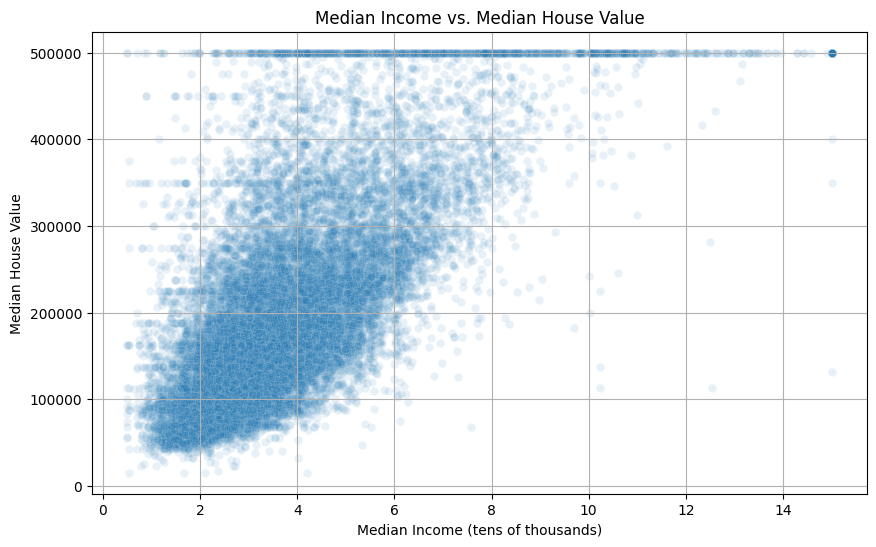

In [21]:
# Plot korelasi median_income dengan median_house_value
plt.figure(figsize=(10, 6))
sns.scatterplot(x='median_income', y='median_house_value', data=housing_data_prepared, alpha=0.1)
plt.title('Median Income vs. Median House Value')
plt.xlabel('Median Income (tens of thousands)')
plt.ylabel('Median House Value')
plt.grid(True)
plt.show()

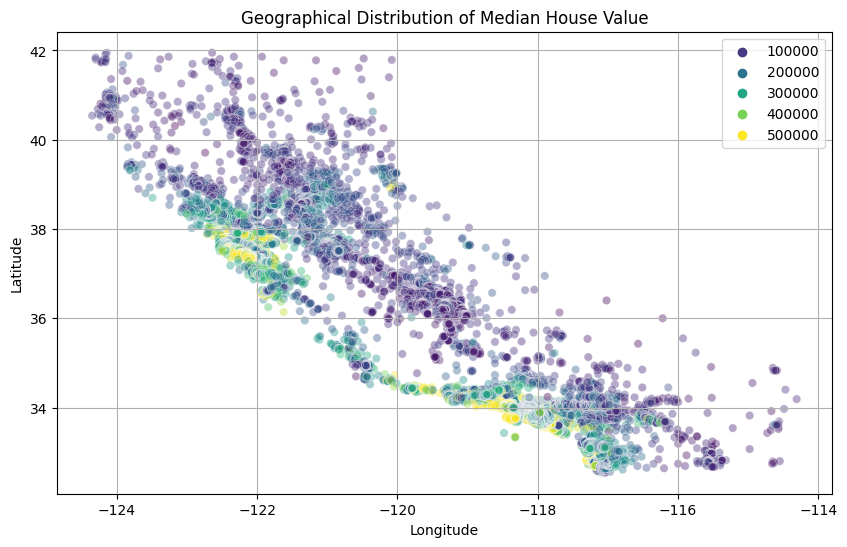

In [22]:
# Plot distribusi geografis median_house_value
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', data=housing_data_prepared,
                hue='median_house_value', palette='viridis', alpha=0.4)
plt.title('Geographical Distribution of Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()

###Hasil Visualisasi:

Median Income vs. Median House Value:

Ada pola korelasi positif yang kuat antara median_income dan median_house_value. Ini mendukung hasil analisis korelasi yang menunjukkan bahwa pendapatan adalah prediktor yang baik untuk nilai rumah.
Terdapat batasan horizontal pada median_house_value, khususnya di sekitar nilai 500,000. Ini bisa menunjukkan adanya batasan harga pada data atau pengaruh dari data capping.
Distribusi Geografis dari Median House Value:

Nilai rumah tampaknya lebih tinggi di daerah dengan lintang lebih rendah, yang mendekati pantai.
Ada konsentrasi tinggi dari nilai rumah yang lebih tinggi di sekitar Bay Area dan Los Angeles.

### Pemodelan

In [23]:
from sklearn.model_selection import train_test_split

# Memisahkan fitur dan target
X = housing_data_prepared.drop('median_house_value', axis=1)
y = housing_data_prepared['median_house_value']

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 13), (4128, 13), (16512,), (4128,))

### Evaluasi Model

In [24]:
# Membuat dan melatih model regresi linier
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Melakukan prediksi pada set pengujian
y_pred = linear_reg.predict(X_test)

# Menghitung Mean Squared Error (MSE) dan Root Mean Squared Error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

mse, rmse

(4908476721.1566305, 70060.52184473528)

RMSE menunjukkan model ini rata-rata memiliki kesalahan sekitar $70,060 dalam memprediksi nilai rumah.

Model dievaluasi menggunakan metrik Mean Absolute Error (MAE). Tujuannya adalah untuk meminimalkan MAE sehingga model dapat membuat prediksi yang lebih akurat.


### Melakukan cross validation dengan beberapa metrik evaluasi

In [25]:
cv_results = cross_validate(lin_reg, X, y, cv=10,
                            scoring=('neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'),
                            return_train_score=True)

# Mengubah nilai negatif menjadi positif untuk MSE dan MAE
cv_results['test_neg_mean_squared_error'] = -cv_results['test_neg_mean_squared_error']
cv_results['train_neg_mean_squared_error'] = -cv_results['train_neg_mean_squared_error']
cv_results['test_neg_mean_absolute_error'] = -cv_results['test_neg_mean_absolute_error']
cv_results['train_neg_mean_absolute_error'] = -cv_results['train_neg_mean_absolute_error']

# Menghitung RMSE dan MAE untuk set pengujian dan pelatihan
test_rmse = np.sqrt(cv_results['test_neg_mean_squared_error'])
train_rmse = np.sqrt(cv_results['train_neg_mean_squared_error'])
test_mae = cv_results['test_neg_mean_absolute_error']
train_mae = cv_results['train_neg_mean_absolute_error']

# Menyiapkan DataFrame untuk menampilkan hasil
cv_df = pd.DataFrame({
    'Test MSE': cv_results['test_neg_mean_squared_error'],
    'Train MSE': cv_results['train_neg_mean_squared_error'],
    'Test RMSE': test_rmse,
    'Train RMSE': train_rmse,
    'Test MAE': test_mae,
    'Train MAE': train_mae,
    'Test R2': cv_results['test_r2'],
    'Train R2': cv_results['train_r2']
})

cv_df.mean()

Test MSE      5.405778e+09
Train MSE     4.693586e+09
Test RMSE     7.222028e+04
Train RMSE    6.849571e+04
Test MAE      5.389610e+04
Train MAE     4.964431e+04
Test R2       5.140090e-01
Train R2      6.467336e-01
dtype: float64

### Kesimpulan

Model ini rata-rata memiliki kesalahan sekitar $70,060 dalam memprediksi nilai rumah.

Saran yang dapat diterapkan untuk meningkatkan model ini:

1. Feature Engineering:
Menambahkan fitur baru yang mungkin memiliki kekuatan prediktif.
Melakukan seleksi fitur untuk menghilangkan fitur yang tidak relevan atau kurang penting.
Membuat fitur polinomial untuk menangkap hubungan non-linear.

2. Model Complexity:
Mencoba model yang lebih kompleks yang dapat menangkap hubungan dan interaksi yang kompleks antara fitur.
Menggunakan metode ensemble seperti Random Forest atau Gradient Boosting.

3. Hyperparameter Tuning:
Menggunakan metode seperti Grid Search atau Randomized Search untuk menemukan set hyperparameter yang optimal.

4. Cross-Validation:
Menggunakan validasi silang untuk memastikan bahwa model dapat digeneralisasi dengan baik ke data yang belum terlihat.

Setelah menerapkan Cross-Validation, hasil validasi silang rata-rata untuk model regresi linear melintasi 10 lipatan adalah sebagai berikut:

Test MSE (Mean Squared Error):
5,41 × 10^9

Train MSE (Mean Squared Error):
4,69 × 10^9

Test RMSE (Root Mean Squared Error):
72.220,28

Train RMSE (Root Mean Squared Error):
68.495,71

Test MAE (Mean Absolute Error):
53.896,10

Train MAE (Mean Absolute Error):
49.644,31

Test R^2 (Koefisien Determinasi):
0,514

Train R^2 (Koefisien Determinasi):
0,647

Hasil ini menyajikan pandangan holistik tentang kinerja model, termasuk metrik kesalahan dan koefisien determinasi (R^2) baik untuk tahap pelatihan maupun pengujian. Nilai R^2 pelatihan yang lebih tinggi dari R^2 pengujian terus menunjukkan bahwa model sedikit overfitting terhadap data pelatihan.
